<a href="https://colab.research.google.com/github/RaghavendraSreenivasa/Project-Kendrick/blob/main/Word_Frequencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-5bd8f56b54db>:33: UserWarning: Glyph 128288 (\N{INPUT SYMBOL FOR LATIN CAPITAL LETTERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128288 (\N{INPUT SYMBOL FOR LATIN CAPITAL LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


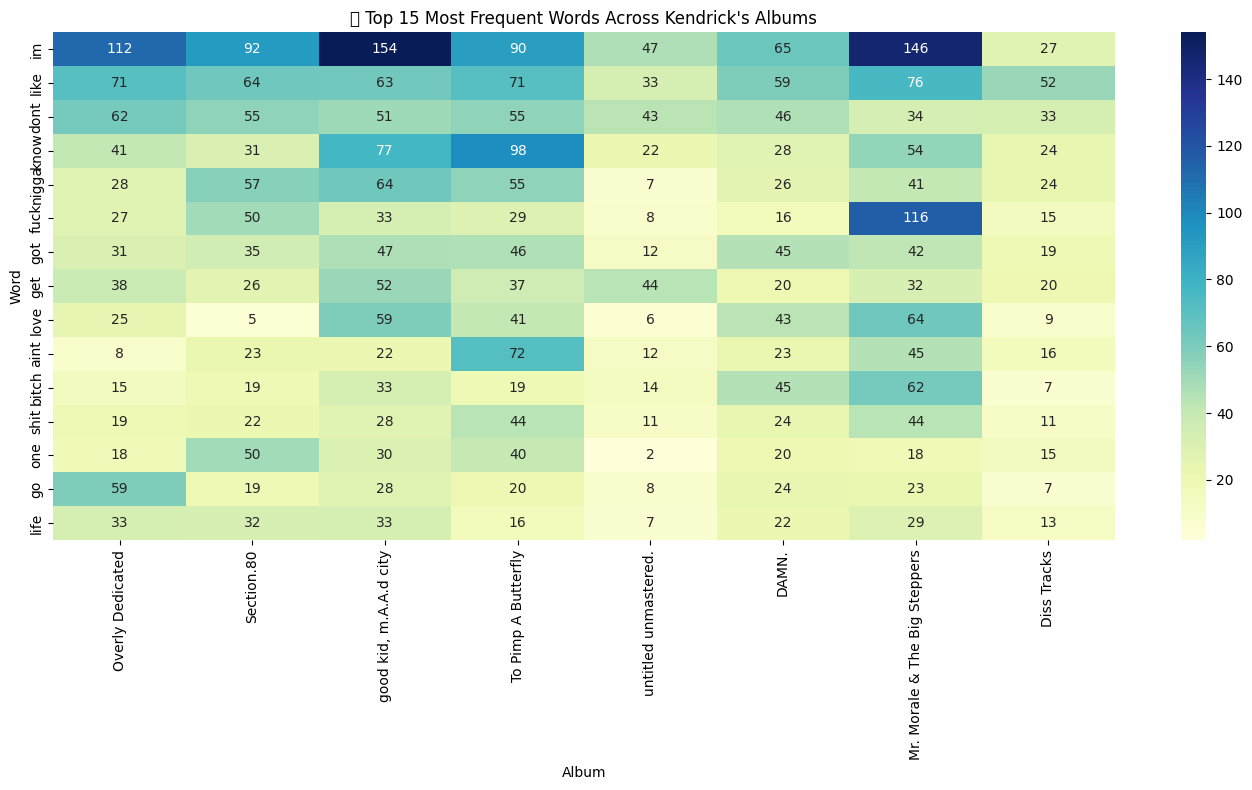

In [4]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/kendrick_sentiment_enriched.csv')



# STEP 1: Create a word frequency table by album
albums = df['album'].unique()
top_words_by_album = {}

# Count word frequencies for each album
for album in albums:
    lyrics = df[df['album'] == album]['deep_clean_lyrics'].str.cat(sep=' ')
    word_freq = Counter(lyrics.split())
    top_words_by_album[album] = dict(word_freq)

# STEP 2: Convert to DataFrame and normalize missing values
freq_df = pd.DataFrame(top_words_by_album).fillna(0).astype(int)

# STEP 3: Select Top N most common words overall
top_n_words = freq_df.sum(axis=1).sort_values(ascending=False).head(15).index
filtered_freq_df = freq_df.loc[top_n_words]

# STEP 4: Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(filtered_freq_df, annot=True, cmap="YlGnBu", fmt='d')
plt.title("🔠 Top 15 Most Frequent Words Across Kendrick's Albums")
plt.xlabel("Album")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [13]:
print (df.head())

           track_name             album release_date  duration_ms  popularity  \
0       Growing Apart  Overly Dedicated   2010-09-14       220995          52   
1  Ignorance Is Bliss  Overly Dedicated   2010-09-14       210494          55   
2             P&P 1.5  Overly Dedicated   2010-09-14       361942          54   
3          Alien Girl  Overly Dedicated   2010-09-14       239973          51   
4   Opposites Attract  Overly Dedicated   2010-09-14       271909          53   

   speechiness  danceability    tempo  \
0       0.3660         0.586  106.835   
1       0.3870         0.644   82.156   
2       0.3690         0.550  146.453   
3       0.0367         0.626   95.948   
4       0.4350         0.608  192.157   

                                              lyrics  \
0  Where are we going? Why are we slowing down?\n...   
1  Lord forgive me\nKill him where he stand and s...   
2  Oh, what up ho? Oh, what up?\nI said, oh, what...   
3  She look better than Beyoncé, Alicia Ke

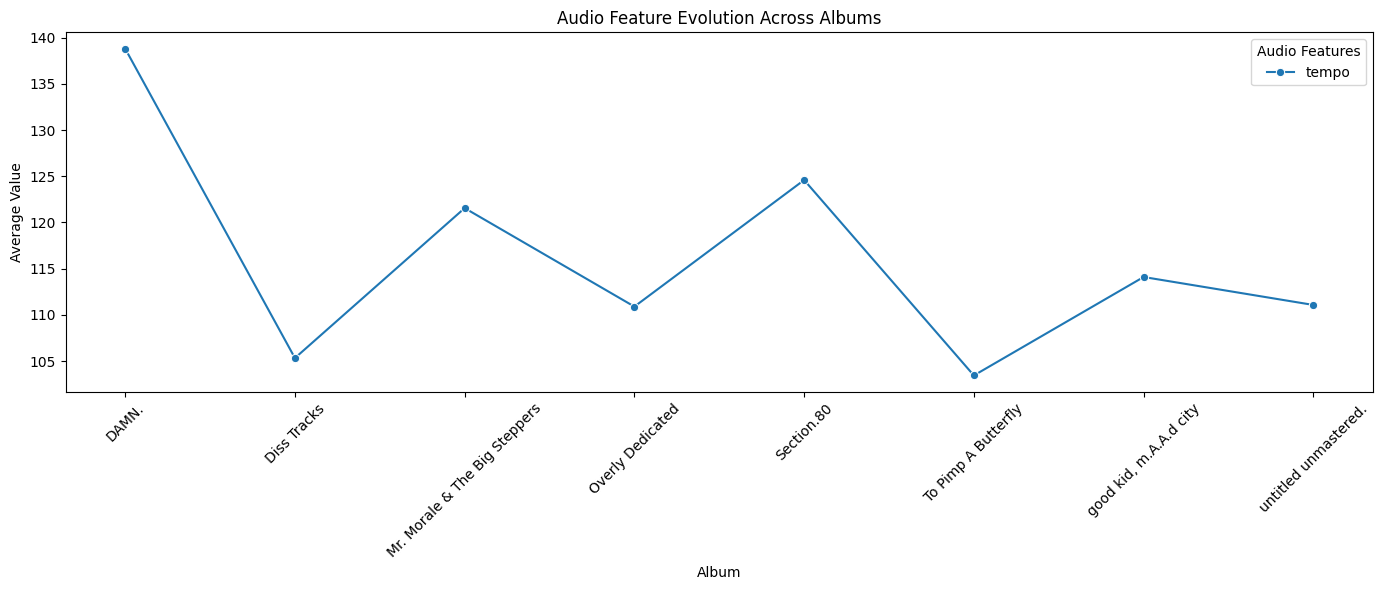

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Calculate average audio features per album
audio_features = ['tempo' ]
album_avgs = df.groupby('album')[audio_features].mean().reset_index()

# STEP 2: Line plots for feature evolution
plt.figure(figsize=(14, 6))
for feature in audio_features:
    sns.lineplot(x='album', y=feature, data=album_avgs, marker='o', label=feature)

plt.title("Audio Feature Evolution Across Albums")
plt.xlabel("Album")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title="Audio Features")
plt.tight_layout()
plt.show()


In [27]:

audio_features = ['tempo', 'danceability', 'speechiness']
album_avgs = df.groupby('album')[audio_features].mean().reset_index()


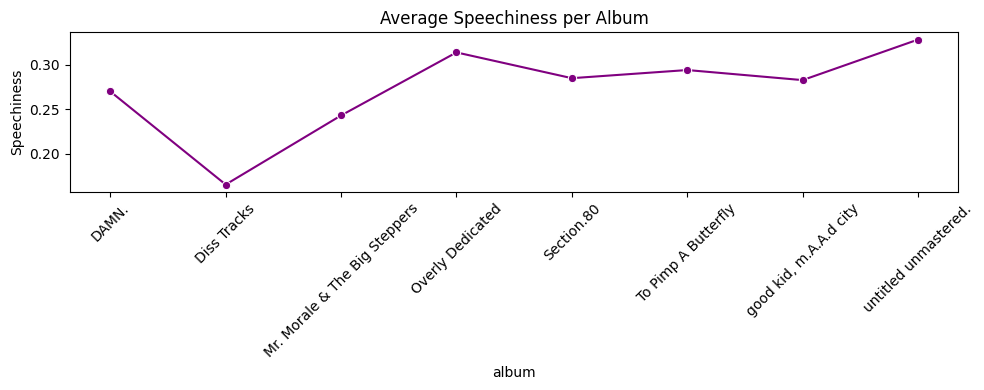

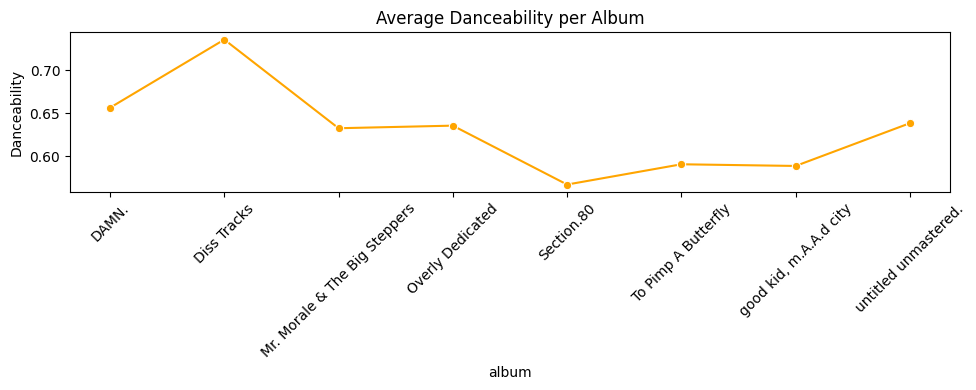

In [28]:
# Speechiness Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x='album', y='speechiness', data=album_avgs, marker='o', color='purple')
plt.title("Average Speechiness per Album")
plt.ylabel("Speechiness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Danceability Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x='album', y='danceability', data=album_avgs, marker='o', color='orange')
plt.title("Average Danceability per Album")
plt.ylabel("Danceability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Correlation Matrix: Popularity vs Audio & Sentiment Features**

<ipython-input-29-0826e740cc42>:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


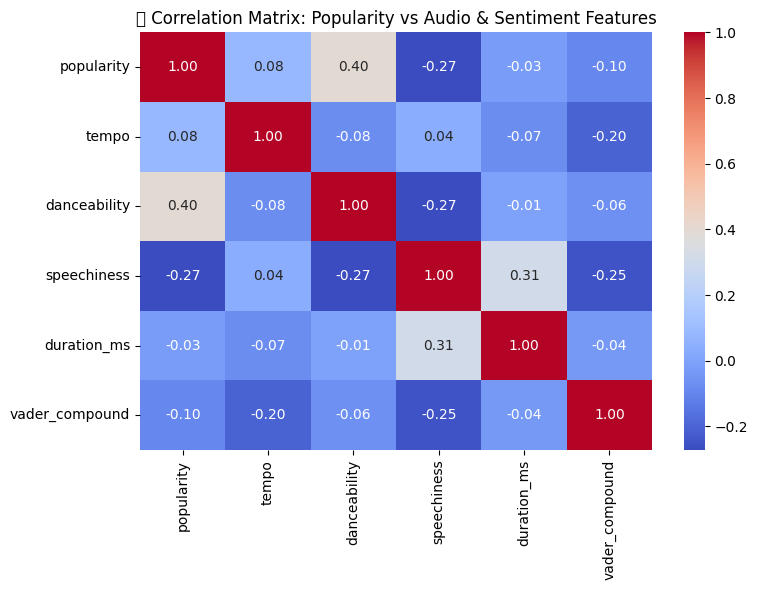

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['popularity', 'tempo', 'danceability', 'speechiness', 'duration_ms', 'vader_compound']
corr_matrix = df[features].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Matrix: Popularity vs Audio & Sentiment Features")
plt.tight_layout()
plt.show()


# **Tempo vs Popularity**

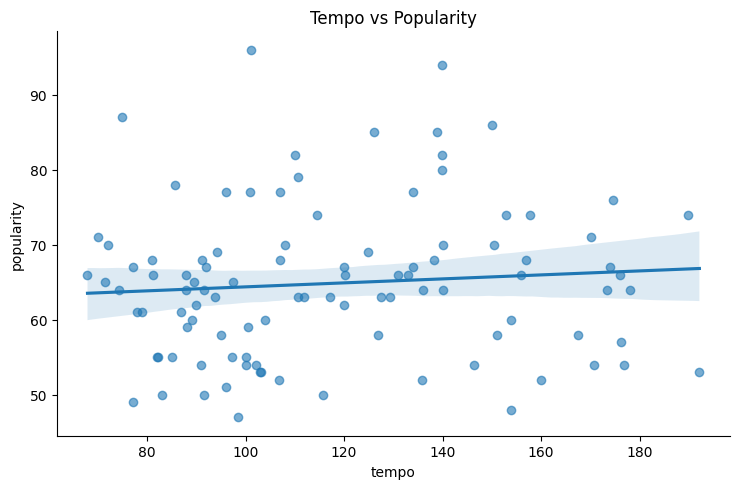

In [37]:
# Tempo vs Popularity
sns.lmplot(data=df, x='tempo', y='popularity', aspect=1.5, scatter_kws={'alpha':0.6})
plt.title("Tempo vs Popularity")
plt.tight_layout()
plt.show()


# **Danceability vs Popularity**

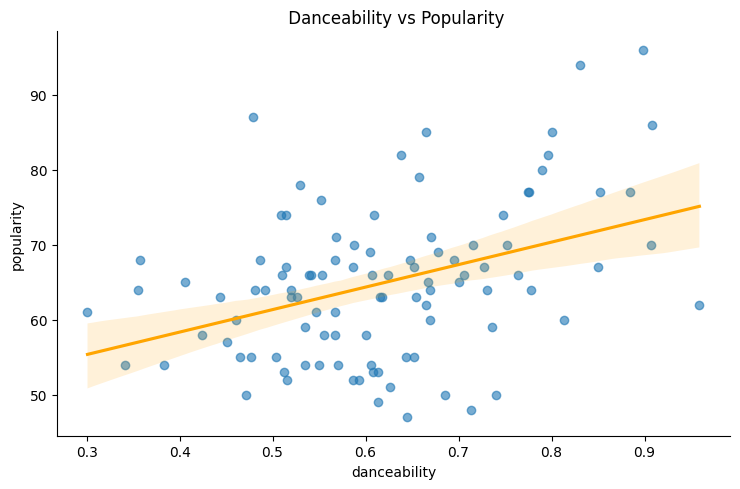

In [38]:
# Danceability vs Popularity
sns.lmplot(data=df, x='danceability', y='popularity', aspect=1.5, scatter_kws={'alpha':0.6}, line_kws={'color': 'orange'}) # Changed 'color' to 'line_kws={'color': 'orange'}'
plt.title(" Danceability vs Popularity")
plt.tight_layout()
plt.show()

# **Sentiment vs Popularity**

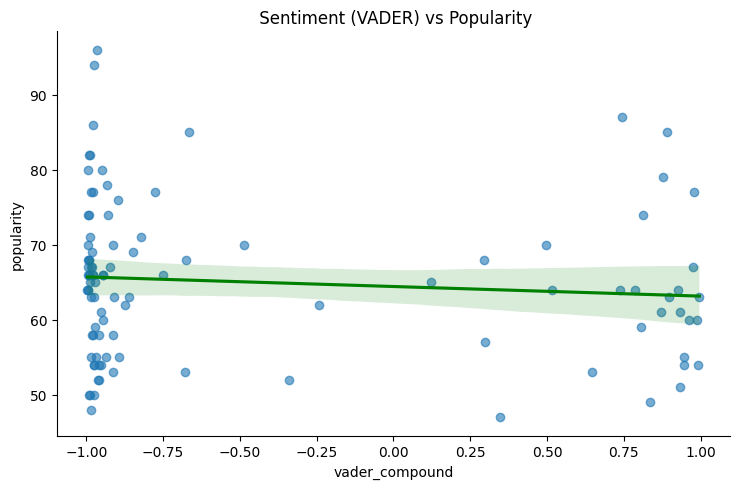

In [39]:
# Sentiment vs Popularity
sns.lmplot(data=df, x='vader_compound', y='popularity', aspect=1.5, scatter_kws={'alpha':0.6}, line_kws={'color': 'green'})  # Changed 'color' to 'line_kws={'color': 'green'}'
plt.title(" Sentiment (VADER) vs Popularity")
plt.tight_layout()
plt.show()

In [42]:
# Convert duration from milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000  # 60,000 ms = 1 minute

# (Optional) Drop the original if you no longer need it:
# df.drop(columns='duration_ms', inplace=True)


# **Normalized Comparison of Kendrick Lamar Albums**

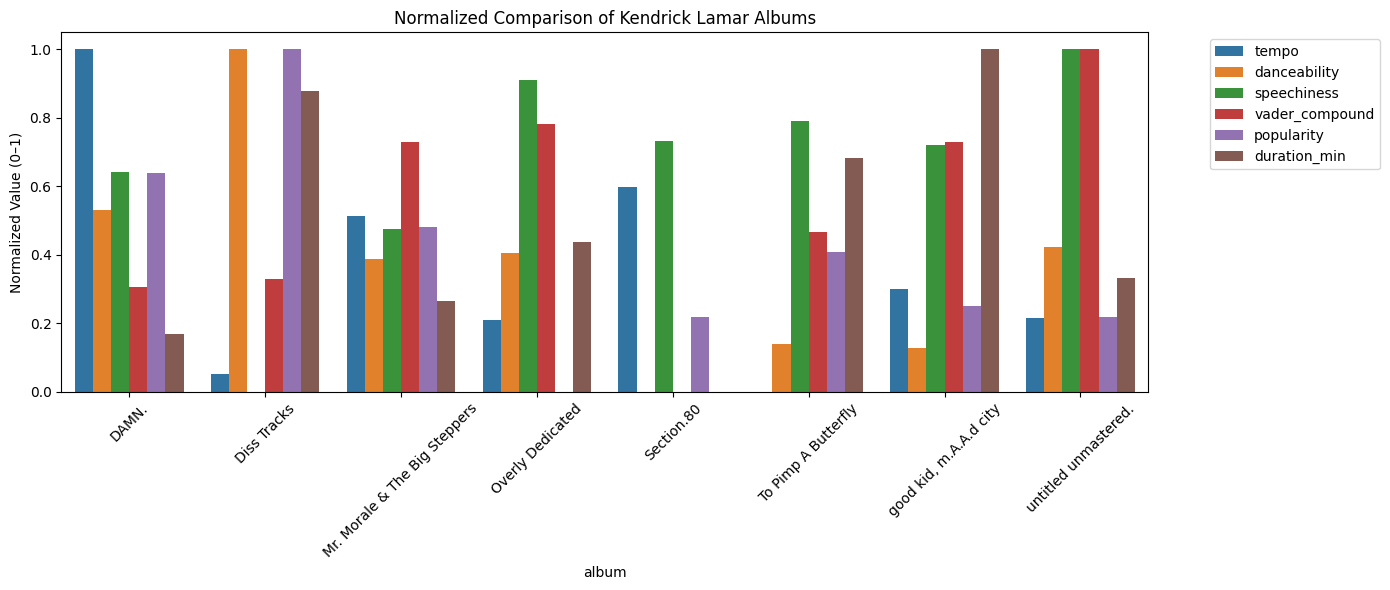

In [45]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# STEP 1: Select features and normalize them
features = ['tempo', 'danceability', 'speechiness', 'vader_compound', 'popularity', 'duration_min']
album_avg = df.groupby('album')[features].mean().reset_index()

# Normalize numeric values (0–1)
scaler = MinMaxScaler()
album_avg_scaled = album_avg.copy()
album_avg_scaled[features] = scaler.fit_transform(album_avg[features])

# STEP 2: Melt for plotting
album_melted = album_avg_scaled.melt(id_vars='album', var_name='Feature', value_name='Normalized')

# STEP 3: Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=album_melted, x='album', y='Normalized', hue='Feature')
plt.title("Normalized Comparison of Kendrick Lamar Albums")
plt.xticks(rotation=45)
plt.ylabel("Normalized Value (0–1)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **Audio & Sentiment Profile**

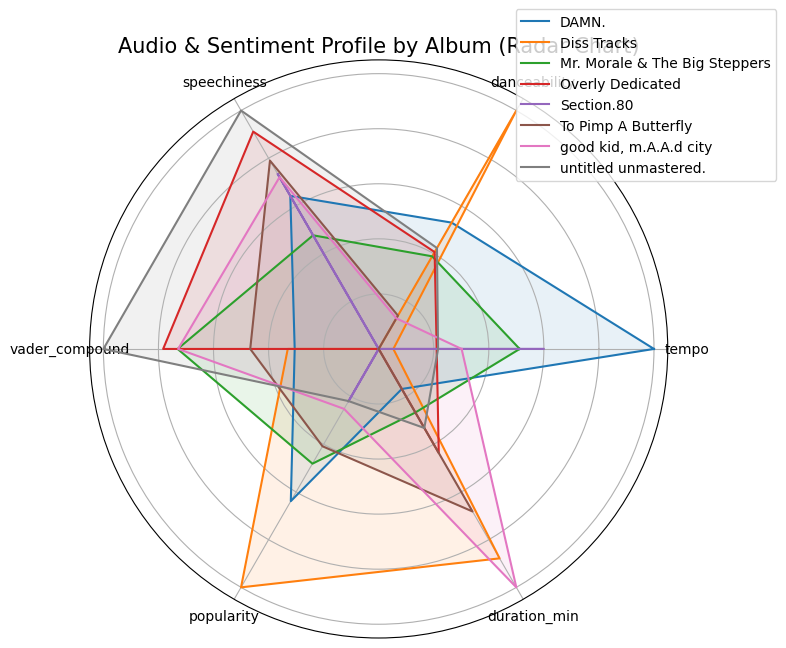

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# STEP 1: Define features and normalize
features = ['tempo', 'danceability', 'speechiness', 'vader_compound', 'popularity', 'duration_min']
album_avg = df.groupby('album')[features].mean()
scaler = MinMaxScaler()
album_scaled = pd.DataFrame(scaler.fit_transform(album_avg), columns=features, index=album_avg.index)

# STEP 2: Radar chart setup
labels = features
num_vars = len(labels)

# Create angles for radar axes
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# STEP 3: Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each album
for album in album_scaled.index:
    values = album_scaled.loc[album].tolist()
    values += values[:1]  # loop to first value
    ax.plot(angles, values, label=album)
    ax.fill(angles, values, alpha=0.1)

# Labels and layout
ax.set_title("Audio & Sentiment Profile by Album (Radar Chart)", size=15)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()
